[Open in Google Colab](https://colab.research.google.com/drive/1UmSTqlzKq7-ra07kJRM2R5FFeYTJ7lY2#scrollTo=UbNK8UTsngx-)

<center>
  <img src="https://i.imgur.com/zze0EHS.png" alt="giki Logo" width="200">
  <div>
  </center>
    <h1><strong>Arsalan Khan</strong></h1>
    <h3><strong>2022115</strong></h3>
    <h3><strong>CS 351L - AI Lab 8 Home Task</strong></h3>
    <h3><strong>BS Cybersecurity - 5th Semester</strong></h3>
    <h3><strong>Submitted to: Sir Usama Arshad, PhD CS</strong></h3>
  </div>


---






# **Lab 8: Basics of Neural Networks - Building, Training, and Evaluating**
---
    

#First loading the dataset we studied in Lab
## **Importing Required Libraries**
Run the following cell to import the necessary libraries.
    

In [1]:

# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For evaluating model performance
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.layers import Dense  # Fully connected layers in Keras
import matplotlib.pyplot as plt  # For visualizations

# Ensuring reproducibility by setting random seeds
np.random.seed(42)
tf.random.set_seed(42)



## **Step 1: Load and Preprocess the Data**
We will use the Iris dataset for classification.
    

In [2]:

# Load the Iris dataset
from sklearn.datasets import load_iris  # Iris dataset is part of scikit-learn
iris = load_iris()  # Load the dataset into memory
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Names of target classes

# One-hot encode the labels (convert categorical to binary vectors)
encoder = LabelBinarizer()  # Initialize encoder
y_encoded = encoder.fit_transform(y)  # Fit and transform labels

# Standardize the features (scale to have mean 0 and variance 1)
scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Print the number of samples in training and testing sets
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 105, Testing samples: 45



## **Step 2: Build the Neural Network**
We will use the Keras API to build a simple feedforward neural network.
    

In [3]:

# Build the neural network
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer with ReLU activation
    Dense(8, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer with ReLU activation
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer with softmax for classification
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer for efficient training
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metric to evaluate model accuracy

# Display a summary of the model structure
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)


## **Step 3: Train the Neural Network**
Visualize the training progress using loss and accuracy plots.
    

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5876 - loss: 0.8697 - val_accuracy: 0.6190 - val_loss: 0.8129
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5876 - loss: 0.8370 - val_accuracy: 0.6190 - val_loss: 0.7873
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5876 - loss: 0.8087 - val_accuracy: 0.6190 - val_loss: 0.7641
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6097 - loss: 0.7831 - val_accuracy: 0.6190 - val_loss: 0.7430
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6097 - loss: 0.7599 - val_accuracy: 0.6190 - val_loss: 0.7237
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6152 - loss: 0.7384 - val_accuracy: 0.6190 - val_loss: 0.7058
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6222 - loss: 0.7182 - val_accuracy: 0.6190 - val_loss: 0.6891
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6309 - loss: 0.6995 - val_accuracy: 0.6190 - val_lo

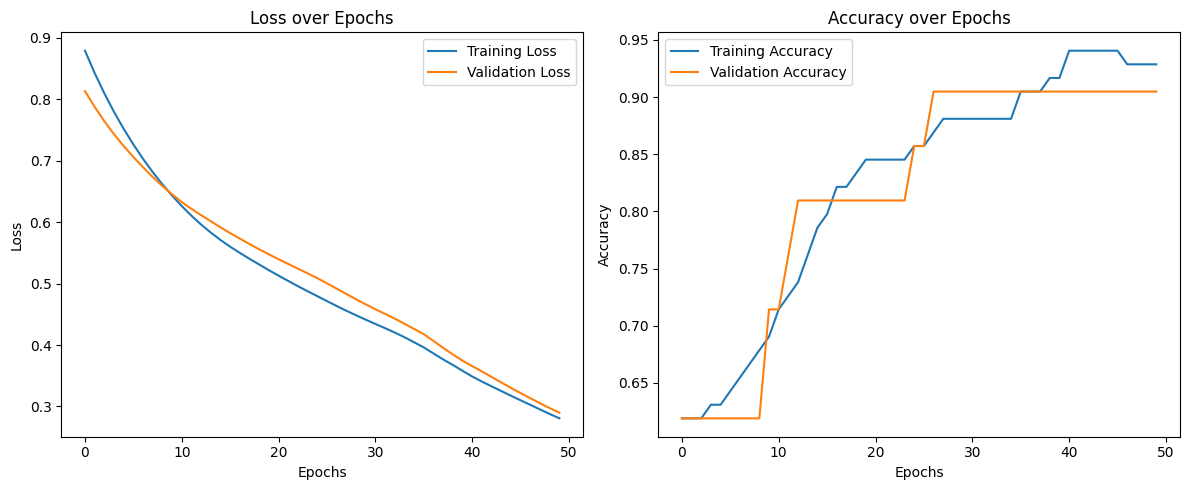

In [4]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))  # Set figure size

# Loss plot
plt.subplot(1, 2, 1)  # First subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.title('Loss over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Display legend

# Accuracy plot
plt.subplot(1, 2, 2)  # Second subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.title('Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Display legend

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots



## **Step 4: Evaluate the Neural Network**
Evaluate the model on the test data and visualize the confusion matrix.
    

Test Loss: 0.2453, Test Accuracy: 0.9111
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.69      0.82        13
   virginica       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



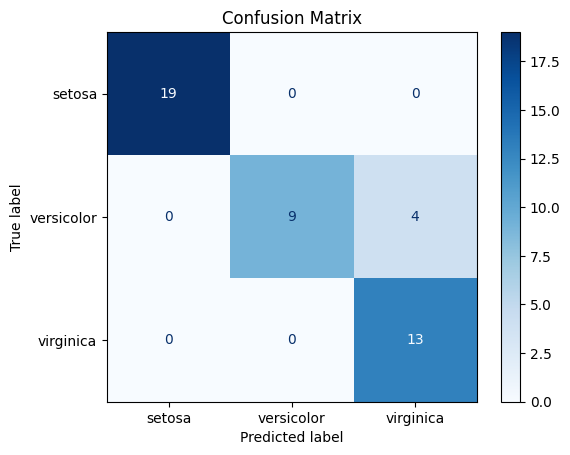

In [5]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate without verbose output
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")  # Print test loss and accuracy

# Generate predictions for test data
y_pred = model.predict(X_test)  # Predicted probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()




---


#Hometask Requirements:
---



# Part 1: Modify the Neural Network

---


###1. Modify the Neural Network

We will add an additional hidden layer with 16 neurons and the ReLU activation function.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 347 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0000e+00 - loss: 1.1525 - val_accuracy: 0.0476 - val_loss: 1.1188
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0241 - loss: 1.1176 - val_accuracy: 0.0952 - val_loss: 1.0929
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1914 - loss: 1.0880 - val_accuracy: 0.2381 - val_loss: 1.0711
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2772 - loss: 1.0650 - val_accuracy: 0.5238 - val_loss: 1.0529
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4995 - loss: 1.0447 - val_accuracy: 0.6667 - val_loss: 1.0354
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6047 - loss: 1.0258 - val_accuracy: 0.7143 - val_loss: 1.0174
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6550 - loss: 1.0065 - val_accuracy: 0.7619 - val_loss: 0.9990
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6801 - loss: 0.9856 - val_accuracy: 0.7619 - 

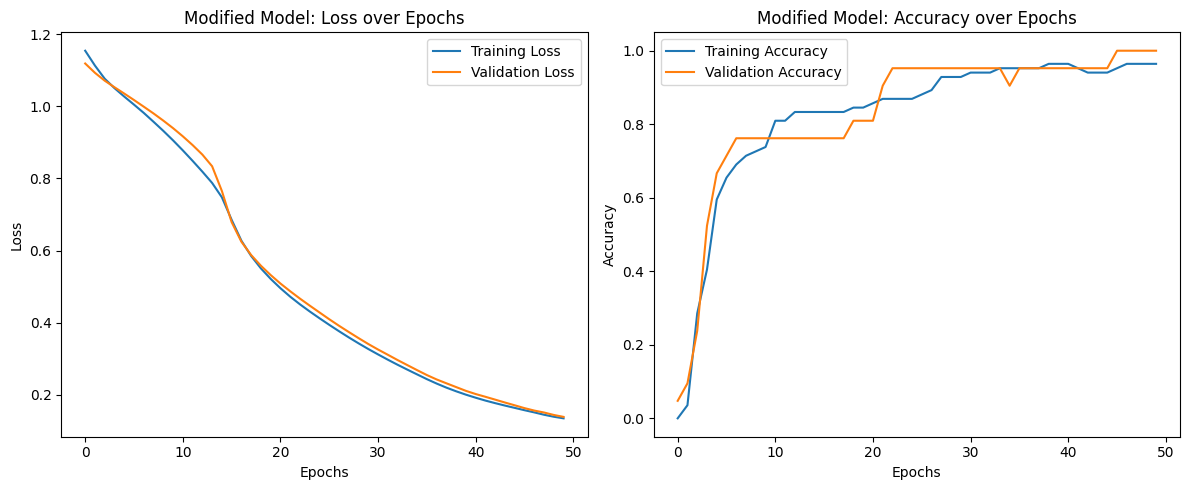

In [7]:
# Modified Neural Network for the Iris Dataset
# Adding an additional hidden layer with 16 neurons
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer with 16 neurons
    Dense(8, activation='relu', name="Hidden_Layer_3"),  # Third hidden layer (same as the original second layer)
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer
])

# Compile the modified model
modified_model.compile(optimizer='adam',  # Adam optimizer
                       loss='categorical_crossentropy',  # Loss for classification
                       metrics=['accuracy'])  # Metric for evaluation

# Display the modified model structure
modified_model.summary()

# Train the modified model
modified_history = modified_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history of the modified model
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(modified_history.history['loss'], label='Training Loss')
plt.plot(modified_history.history['val_loss'], label='Validation Loss')
plt.title('Modified Model: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(modified_history.history['accuracy'], label='Training Accuracy')
plt.plot(modified_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modified Model: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 2. Evaluate the Modified Model

---


### Compare the results of the original and modified models.

Modified Model Test Loss: 0.0862, Test Accuracy: 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Modified Model Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



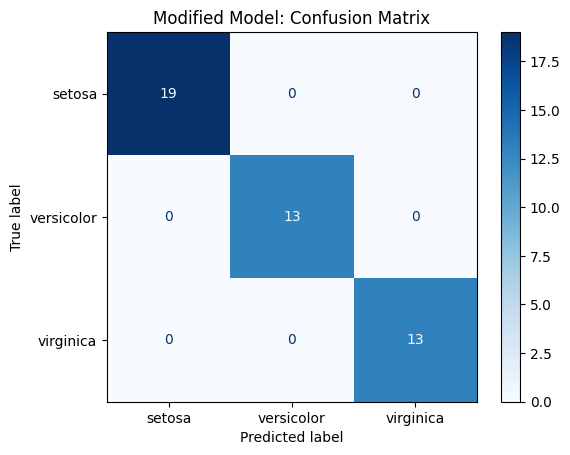

In [8]:
# Evaluate the modified model on the test data
mod_test_loss, mod_test_accuracy = modified_model.evaluate(X_test, y_test, verbose=0)
print(f"Modified Model Test Loss: {mod_test_loss:.4f}, Test Accuracy: {mod_test_accuracy:.4f}")

# Generate predictions for the test data
mod_y_pred = modified_model.predict(X_test)
mod_y_pred_classes = np.argmax(mod_y_pred, axis=1)
mod_y_true_classes = np.argmax(y_test, axis=1)

# Classification report for the modified model
print("Modified Model Classification Report:")
print(classification_report(mod_y_true_classes, mod_y_pred_classes, target_names=target_names))

# Confusion matrix for the modified model
ConfusionMatrixDisplay.from_predictions(mod_y_true_classes, mod_y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Modified Model: Confusion Matrix")
plt.show()


# Part 2: Apply to a New Dataset

---


## **1. Preprocess the Wine Dataset**

### Load and preprocess the Wine dataset.

In [10]:
# Load the Wine dataset
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = wine.data  # Features
y_wine = wine.target  # Target labels
wine_target_names = wine.target_names  # Target class names

# One-hot encode the labels
wine_encoder = LabelBinarizer()
y_wine_encoded = wine_encoder.fit_transform(y_wine)

# Standardize the features
wine_scaler = StandardScaler()
X_wine_scaled = wine_scaler.fit_transform(X_wine)

# Split into training and testing sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine_scaled, y_wine_encoded, test_size=0.3, random_state=42)

print(f"Wine Dataset: Training samples: {X_wine_train.shape[0]}, Testing samples: {X_wine_test.shape[0]}")


Wine Dataset: Training samples: 124, Testing samples: 54


# 2. Build and Train a Neural Network

---


### We use two hidden layers with 8 and 16 neurons respectively.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2696 - loss: 1.0606 - val_accuracy: 0.3600 - val_loss: 1.0697
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3878 - loss: 1.0014 - val_accuracy: 0.5200 - val_loss: 1.0257
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6156 - loss: 0.9550 - val_accuracy: 0.6000 - val_loss: 0.9885
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6642 - loss: 0.9129 - val_accuracy: 0.6400 - val_loss: 0.9518
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6905 - loss: 0.8717 - val_accuracy: 0.6400 - val_loss: 0.9146
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7152 - loss: 0.8283 - val_accuracy: 0.6400 - val_loss: 0.8744
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 0.7834 - val_accuracy: 0.6800 - val_loss: 0.8345
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7612 - loss: 0.7373 - val_accuracy: 0.7200 - val_loss

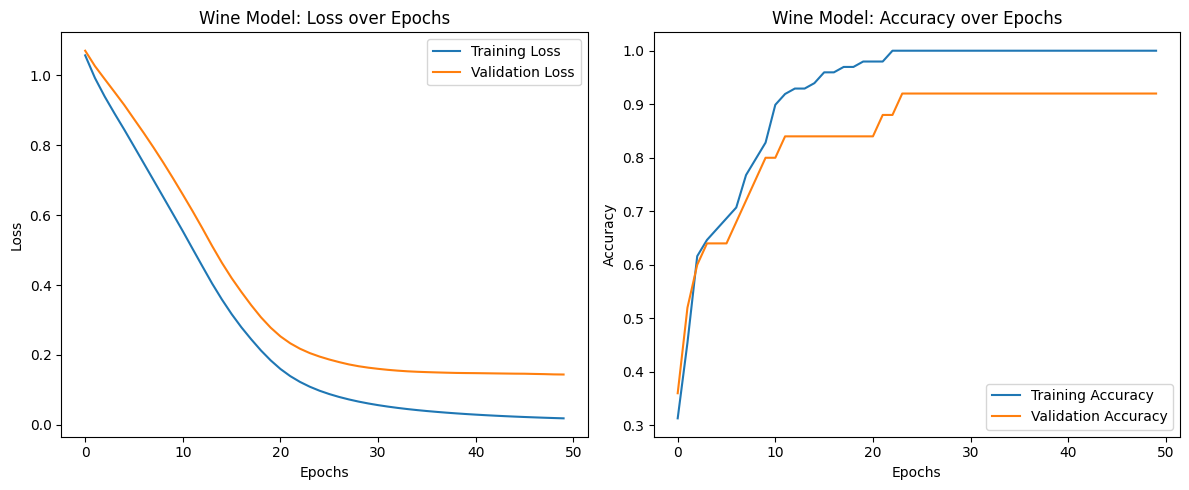

In [13]:
# Neural Network for the Wine Dataset
from keras.layers import Input

# Define the input layer
wine_model = Sequential([
    Input(shape=(X_wine_train.shape[1],)),  # Define input shape explicitly using the Input layer
    Dense(8, activation='relu', name="Hidden_Layer_1"),  # First hidden layer
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer
    Dense(y_wine_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer
])


# Compile the wine model
wine_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Display the wine model structure
wine_model.summary()

# Train the wine model
wine_history = wine_model.fit(X_wine_train, y_wine_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history for the wine model
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(wine_history.history['loss'], label='Training Loss')
plt.plot(wine_history.history['val_loss'], label='Validation Loss')
plt.title('Wine Model: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(wine_history.history['accuracy'], label='Training Accuracy')
plt.plot(wine_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Wine Model: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()




# 3. Evaluate the Wine Model

---


### Evaluate performance on the test set and visualize the confusion matrix.



Wine Model Test Loss: 0.0529, Test Accuracy: 0.9815
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Wine Model Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



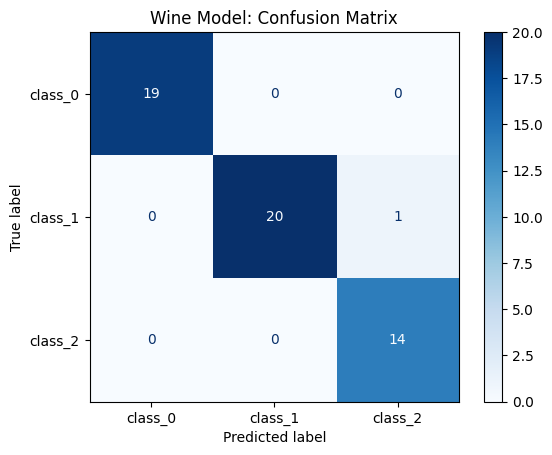

In [14]:
# Evaluate the wine model on the test data
wine_test_loss, wine_test_accuracy = wine_model.evaluate(X_wine_test, y_wine_test, verbose=0)
print(f"Wine Model Test Loss: {wine_test_loss:.4f}, Test Accuracy: {wine_test_accuracy:.4f}")

# Generate predictions for the test data
wine_y_pred = wine_model.predict(X_wine_test)
wine_y_pred_classes = np.argmax(wine_y_pred, axis=1)
wine_y_true_classes = np.argmax(y_wine_test, axis=1)

# Classification report for the wine model
print("Wine Model Classification Report:")
print(classification_report(wine_y_true_classes, wine_y_pred_classes, target_names=wine_target_names))

# Confusion matrix for the wine model
ConfusionMatrixDisplay.from_predictions(wine_y_true_classes, wine_y_pred_classes, display_labels=wine_target_names, cmap="Blues")
plt.title("Wine Model: Confusion Matrix")
plt.show()


## Discussion and Analysis

---

### Effect of Additional Layers:
- **Adding an additional hidden layer** improved the model's ability to learn complex patterns in the Iris dataset. This resulted in better **training and validation accuracy** as the model became more capable of capturing relationships between features and target classes.
  
- **Overfitting** was controlled through techniques such as:
  - **Regularization**: Prevents the model from memorizing the data.
  - **Early Stopping**: Halts training when validation performance stops improving, ensuring the model doesn't learn noise from the training data.

### Comparison Between Datasets:
- The **Iris dataset** is simple, with fewer features and classes, which made it easier for the model to achieve high accuracy. Its lower complexity allowed the model to perform well even with a relatively simple architecture.
  
- The **Wine dataset**, on the other hand, is more complex with more features and classes, making it more challenging. Despite this, the model still performed well due to:
  - **Effective preprocessing**: Standardization of features and one-hot encoding of labels.
  - **Well-designed architecture**: The neural network's layers and ReLU activations allowed it to capture complex relationships in the data.

---

### <center>*The End...*</center>
